# Descarga Personalizada de Datos de LibriBrain

Este notebook te permite descargar fragmentos específicos del dataset de LibriBrain. Para ello, solo necesitas configurar los parámetros en la siguiente celda de código y ejecutarla.

### Parámetros de Configuración:

*   `ruta_personalizada_datos`: Es la carpeta en tu ordenador donde se guardarán los archivos descargados. Puedes poner la ruta que prefieras.
*   `grabaciones_a_descargar`: Esta es una lista que define exactamente qué grabaciones quieres. Cada grabación es una tupla con el formato `("sujeto", "sesión", "tarea", "pasada")`.
    *   **Sujeto**: Siempre será `"0"`.
    *   **Sesión**: Elige el número de la sesión (capítulo) que te interese (p. ej., `"1"`, `"2"`, `"10"`).
    *   **Tarea**: Elige la tarea (libro) que te interese (p. ej., `"Sherlock1"`, `"Sherlock2"`).
    *   **Pasada (Run)**: Normalmente será `"1"`.
    *   Puedes añadir varias tuplas a la lista para descargar múltiples grabaciones a la vez.

In [2]:
# ==============================================================================
# ⚙️ CONFIGURA AQUÍ TU DESCARGA
# Modifica los valores de estas variables para elegir qué descargar y dónde.
# ==============================================================================

# 1. Elige la carpeta donde guardarás los datos.
#    La carpeta se creará si no existe.
ruta_personalizada_datos = "/home/jpdevopti/Repositorios/LibriBrian_Competition/Data/"

# 2. Especifica las grabaciones que quieres descargar.
#    Formato: [("sujeto", "sesión", "tarea", "pasada"), ...]
#    Ejemplo para descargar la sesión 3 de Sherlock1 y la sesión 5 de Sherlock2:
#    grabaciones_a_descargar = [("0", "3", "Sherlock1", "1"), ("0", "5", "Sherlock2", "1")]
grabaciones_a_descargar = [("0", "1", "Sherlock1", "1")]

In [3]:
# ==============================================================================
# 📥 DESCARGA DE DATOS
# Esta celda se encarga únicamente de descargar los datos especificados.
# ==============================================================================

from pnpl.datasets import LibriBrainSpeech
from torch.utils.data import DataLoader
import os

print("🔄 Iniciando el proceso de descarga de datos...")
print(f"📁 Ruta de datos seleccionada: '{os.path.abspath(ruta_personalizada_datos)}'")
print(f"📋 Grabaciones a descargar: {grabaciones_a_descargar}")
print("-" * 50)

try:
    print("⬇️  Descargando datos...")
    print("💡 Nota: La primera vez puede tardar varios minutos dependiendo de tu conexión.")
    
    # Crear el objeto del dataset (esto descarga automáticamente si es necesario)
    dataset_personalizado = LibriBrainSpeech(
        data_path=ruta_personalizada_datos,
        include_run_keys=grabaciones_a_descargar,
        preload_files=True
    )

    # Crear DataLoader para uso posterior
    dataloader_personalizado = DataLoader(dataset_personalizado, batch_size=32, shuffle=True)
    
    print("-" * 50)
    print("✅ ¡DESCARGA COMPLETADA CON ÉXITO!")
    print(f"📊 Se han cargado {len(dataset_personalizado)} muestras en total")
    print(f"📁 Los archivos se encuentran en: '{os.path.abspath(ruta_personalizada_datos)}'")
    print("🚀 Dataset listo para análisis. Ejecuta la siguiente celda para ver el análisis detallado.")
    
except Exception as e:
    print(f"❌ Error durante la descarga: {e}")
    print("🔧 Posibles soluciones:")
    print("   • Verifica tu conexión a internet")
    print("   • Revisa que la ruta de descarga sea válida")
    print("   • Asegúrate de tener suficiente espacio en disco")
    print("   • Verifica que las librerías estén instaladas: %pip install -q pnpl torch")
    import traceback
    traceback.print_exc()

🔄 Iniciando el proceso de descarga de datos...
📁 Ruta de datos seleccionada: '/home/jpdevopti/Repositorios/LibriBrian_Competition/Data'
📋 Grabaciones a descargar: [('0', '1', 'Sherlock1', '1')]
--------------------------------------------------
⬇️  Descargando datos...
💡 Nota: La primera vez puede tardar varios minutos dependiendo de tu conexión.


(…)-0_ses-1_task-Sherlock1_run-1_events.tsv:   0%|          | 0.00/1.11M [00:00<?, ?B/s]

(…)2Bheadpos%2Bsss%2Bnotch%2Bbp%2Bds_meg.h5:   0%|          | 0.00/342M [00:00<?, ?B/s]

Done!
calculated stats for:  ('0', '1', 'Sherlock1', '1')
--------------------------------------------------
✅ ¡DESCARGA COMPLETADA CON ÉXITO!
📊 Se han cargado 2197 muestras en total
📁 Los archivos se encuentran en: '/home/jpdevopti/Repositorios/LibriBrian_Competition/Data'
🚀 Dataset listo para análisis. Ejecuta la siguiente celda para ver el análisis detallado.


🔍 Iniciando análisis detallado de los datos descargados...
1️⃣ ESTRUCTURA DE ARCHIVOS DESCARGADOS
----------------------------------------
📊 Archivos .h5 (datos MEG): 1
📋 Archivos .tsv (etiquetas): 1
🔧 Archivos .json (metadatos): 0

📁 Detalle de archivos .h5:
   📄 sub-0_ses-1_task-Sherlock1_run-1_proc-bads+headpos+sss+notch+bp+ds_meg.h5 (326.0 MB)
💾 Tamaño total de datos: 326.0 MB

2️⃣ ANÁLISIS DE SEÑALES MEG
----------------------------------------
🔬 Analizando: sub-0_ses-1_task-Sherlock1_run-1_proc-bads+headpos+sss+notch+bp+ds_meg.h5
🧠 Número de canales MEG: 306
⏱️  Puntos temporales: 278,000
⏰ Duración total: 1112.0 segundos (18.5 minutos)
📡 Frecuencia de muestreo: 250 Hz
📊 Forma de datos: (306, 278000)

📈 Estadísticas de las señales MEG:
   • Valor mínimo: -5.50e-09
   • Valor máximo: 3.08e-09
   • Media global: -2.12e-14
   • Desviación estándar: 2.28e-11
   • Mediana: 7.43e-15
   • Media por canal - min: -1.20e-11, max: 6.67e-12
   • Std por canal - min: 2.12e-13, max: 1.94e-10



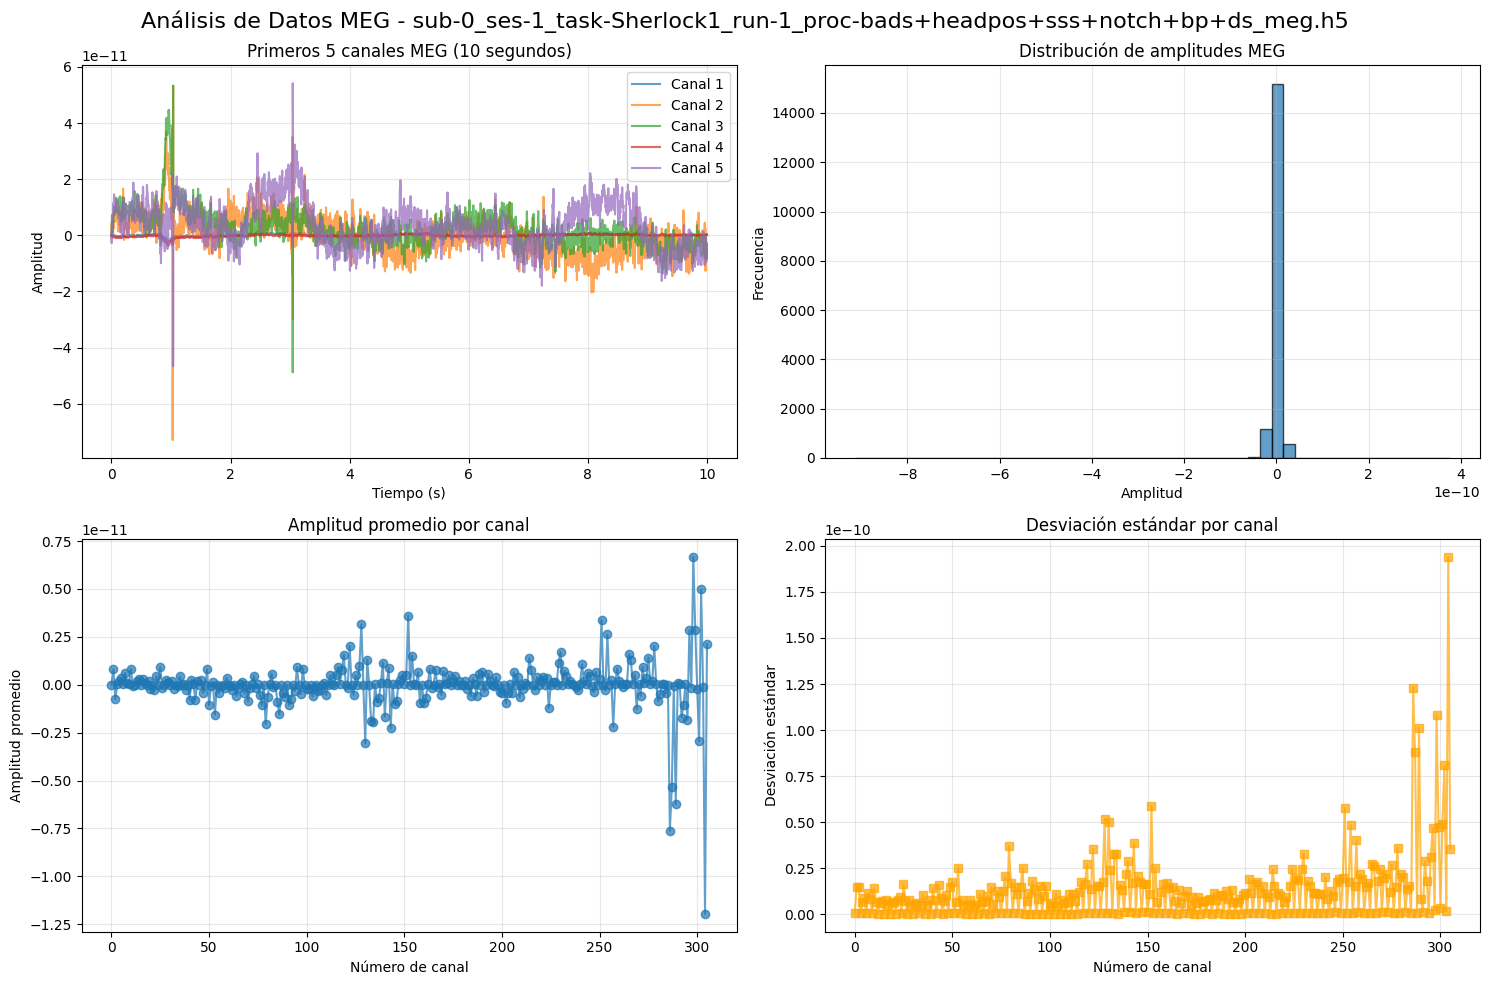

✅ Gráficos generados exitosamente!

6️⃣ RESUMEN FINAL
📋 RESUMEN DEL ANÁLISIS COMPLETADO:
✅ Archivos descargados: 1 .h5 + 1 .tsv
✅ Tamaño total: 326.0 MB
✅ Muestras procesadas: 2,197
✅ Canales MEG: 306
✅ Duración total: 18.5 minutos
✅ Frecuencia de muestreo: 250 Hz
🚀 Datos listos para entrenamiento de modelos!


In [4]:
# ==============================================================================
# 🔍 ANÁLISIS DETALLADO DE DATOS
# Esta celda analiza a fondo los datos que acabas de descargar.
# ==============================================================================

import numpy as np
import pandas as pd
import h5py
import matplotlib.pyplot as plt
from pathlib import Path

print("🔍 Iniciando análisis detallado de los datos descargados...")
print("=" * 60)

try:
    # Verificar que los datos estén cargados
    if 'dataset_personalizado' not in locals():
        print("⚠️  Parece que no has ejecutado la celda de descarga aún.")
        print("🚀 Por favor, ejecuta primero la celda anterior para descargar los datos.")
    else:
        # =========================================================================
        # 1. ANÁLISIS DE ESTRUCTURA DE ARCHIVOS
        # =========================================================================
        print("1️⃣ ESTRUCTURA DE ARCHIVOS DESCARGADOS")
        print("-" * 40)
        
        data_path = Path(ruta_personalizada_datos)
        h5_files = list(data_path.glob("**/*.h5"))
        tsv_files = list(data_path.glob("**/*.tsv"))
        json_files = list(data_path.glob("**/*.json"))
        
        print(f"📊 Archivos .h5 (datos MEG): {len(h5_files)}")
        print(f"📋 Archivos .tsv (etiquetas): {len(tsv_files)}")
        print(f"🔧 Archivos .json (metadatos): {len(json_files)}")
        
        total_size_mb = 0
        print(f"\n📁 Detalle de archivos .h5:")
        for h5_file in h5_files:
            file_size_mb = h5_file.stat().st_size / (1024 * 1024)
            total_size_mb += file_size_mb
            print(f"   📄 {h5_file.name} ({file_size_mb:.1f} MB)")
        
        print(f"💾 Tamaño total de datos: {total_size_mb:.1f} MB")
        
        # =========================================================================
        # 2. ANÁLISIS DETALLADO DE DATOS MEG
        # =========================================================================
        print(f"\n2️⃣ ANÁLISIS DE SEÑALES MEG")
        print("-" * 40)
        
        if h5_files:
            # Analizar el primer archivo como ejemplo
            hdf5_file_path = h5_files[0]
            print(f"🔬 Analizando: {hdf5_file_path.name}")
            
            with h5py.File(hdf5_file_path, 'r') as f:
                data = f["data"][:]
                times = f["times"][:]
            
            n_channels, n_timepoints = data.shape
            duration_seconds = times[-1] - times[0]
            sampling_rate = 1 / (times[1] - times[0])
            duration_minutes = duration_seconds / 60
            
            print(f"🧠 Número de canales MEG: {n_channels}")
            print(f"⏱️  Puntos temporales: {n_timepoints:,}")
            print(f"⏰ Duración total: {duration_seconds:.1f} segundos ({duration_minutes:.1f} minutos)")
            print(f"📡 Frecuencia de muestreo: {sampling_rate:.0f} Hz")
            print(f"📊 Forma de datos: {data.shape}")
            
            # Estadísticas detalladas
            print(f"\n📈 Estadísticas de las señales MEG:")
            print(f"   • Valor mínimo: {np.min(data):.2e}")
            print(f"   • Valor máximo: {np.max(data):.2e}")
            print(f"   • Media global: {np.mean(data):.2e}")
            print(f"   • Desviación estándar: {np.std(data):.2e}")
            print(f"   • Mediana: {np.median(data):.2e}")
            
            # Análisis por canal
            channel_means = np.mean(data, axis=1)
            channel_stds = np.std(data, axis=1)
            print(f"   • Media por canal - min: {np.min(channel_means):.2e}, max: {np.max(channel_means):.2e}")
            print(f"   • Std por canal - min: {np.min(channel_stds):.2e}, max: {np.max(channel_stds):.2e}")
        
        # =========================================================================
        # 3. ANÁLISIS DE ETIQUETAS Y EVENTOS
        # =========================================================================
        print(f"\n3️⃣ ANÁLISIS DE ETIQUETAS Y EVENTOS")
        print("-" * 40)
        
        if tsv_files:
            tsv_file_path = tsv_files[0]
            events_df = pd.read_csv(tsv_file_path, sep='\t')
            
            print(f"📋 Archivo de eventos: {tsv_file_path.name}")
            print(f"📊 Número total de eventos: {len(events_df):,}")
            print(f"🏷️  Columnas disponibles: {list(events_df.columns)}")
            
            # Mostrar muestra de datos
            print(f"\n📝 Muestra de los primeros eventos:")
            print(events_df.head())
            
            # Análisis por tipo de evento
            if 'kind' in events_df.columns:
                event_counts = events_df['kind'].value_counts()
                print(f"\n🏷️  Distribución de tipos de eventos:")
                for event_type, count in event_counts.items():
                    percentage = (count / len(events_df)) * 100
                    print(f"   • {event_type}: {count:,} eventos ({percentage:.1f}%)")
            
            # Análisis temporal
            if 'kind' in events_df.columns and 'timemeg' in events_df.columns:
                speech_events = events_df[events_df['kind'].isin(['word', 'phoneme'])]
                silence_events = events_df[events_df['kind'] == 'silence']
                
                print(f"\n⏰ Análisis temporal:")
                print(f"   • Tiempo total de la grabación: {events_df['timemeg'].max():.1f} segundos")
                
                if len(speech_events) > 0:
                    speech_total_time = len(speech_events) * 0.004  # Asumiendo 250Hz
                    print(f"   🗣️  Eventos de habla: {len(speech_events):,} ({speech_total_time:.1f}s)")
                
                if len(silence_events) > 0:
                    silence_total_time = len(silence_events) * 0.004
                    print(f"   🔇 Eventos de silencio: {len(silence_events):,} ({silence_total_time:.1f}s)")
        
        # =========================================================================
        # 4. ANÁLISIS DEL DATASET PROCESADO
        # =========================================================================
        print(f"\n4️⃣ ANÁLISIS DEL DATASET PROCESADO")
        print("-" * 40)
        
        print(f"🔢 Total de muestras en el dataset: {len(dataset_personalizado):,}")
        
        # Obtener información de una muestra
        sample_batch = next(iter(dataloader_personalizado))
        sample_data, sample_labels = sample_batch
        
        print(f"📦 Configuración del DataLoader:")
        print(f"   • Batch size: {sample_data.shape[0]}")
        print(f"   • Forma de datos por muestra: {sample_data.shape[1:]}")
        print(f"   • Forma de etiquetas por muestra: {sample_labels.shape[1:] if len(sample_labels.shape) > 1 else 'Etiqueta única'}")
        print(f"   • Tipo de datos: {sample_data.dtype}")
        
        # Análisis de etiquetas en el batch
        if len(sample_labels.shape) > 1:
            labels_flat = sample_labels.flatten()
        else:
            labels_flat = sample_labels
        
        unique_labels, label_counts = np.unique(labels_flat.numpy(), return_counts=True)
        print(f"\n🏷️  Distribución de etiquetas en este batch:")
        for label, count in zip(unique_labels, label_counts):
            percentage = (count / len(labels_flat)) * 100
            label_name = "Silencio" if label == 0 else "Habla"
            print(f"   • {label_name} ({label}): {count:,} muestras ({percentage:.1f}%)")
        
        # =========================================================================
        # 5. VISUALIZACIONES
        # =========================================================================
        print(f"\n5️⃣ GENERANDO VISUALIZACIONES")
        print("-" * 40)
        
        if h5_files:
            print("📊 Creando gráficos de las señales MEG...")
            
            # Configurar el plot
            fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(15, 10))
            fig.suptitle(f'Análisis de Datos MEG - {hdf5_file_path.name}', fontsize=16)
            
            # Gráfico 1: Señales MEG en el tiempo
            time_subset = times[times <= 10.0]  # Primeros 10 segundos
            data_subset = data[:5, :len(time_subset)]  # Primeros 5 canales
            
            for i in range(5):
                ax1.plot(time_subset, data_subset[i], alpha=0.7, label=f'Canal {i+1}')
            ax1.set_title("Primeros 5 canales MEG (10 segundos)")
            ax1.set_xlabel("Tiempo (s)")
            ax1.set_ylabel("Amplitud")
            ax1.grid(True, alpha=0.3)
            ax1.legend()
            
            # Gráfico 2: Histograma de amplitudes
            ax2.hist(data.flatten()[::5000], bins=50, alpha=0.7, edgecolor='black')
            ax2.set_title("Distribución de amplitudes MEG")
            ax2.set_xlabel("Amplitud")
            ax2.set_ylabel("Frecuencia")
            ax2.grid(True, alpha=0.3)
            
            # Gráfico 3: Promedio por canal
            channel_means = np.mean(data, axis=1)
            ax3.plot(channel_means, 'o-', alpha=0.7)
            ax3.set_title("Amplitud promedio por canal")
            ax3.set_xlabel("Número de canal")
            ax3.set_ylabel("Amplitud promedio")
            ax3.grid(True, alpha=0.3)
            
            # Gráfico 4: Desviación estándar por canal
            channel_stds = np.std(data, axis=1)
            ax4.plot(channel_stds, 's-', alpha=0.7, color='orange')
            ax4.set_title("Desviación estándar por canal")
            ax4.set_xlabel("Número de canal")
            ax4.set_ylabel("Desviación estándar")
            ax4.grid(True, alpha=0.3)
            
            plt.tight_layout()
            plt.show()
            
            print("✅ Gráficos generados exitosamente!")
        
        # =========================================================================
        # 6. RESUMEN FINAL
        # =========================================================================
        print(f"\n6️⃣ RESUMEN FINAL")
        print("=" * 60)
        print("📋 RESUMEN DEL ANÁLISIS COMPLETADO:")
        print(f"✅ Archivos descargados: {len(h5_files)} .h5 + {len(tsv_files)} .tsv")
        print(f"✅ Tamaño total: {total_size_mb:.1f} MB")
        print(f"✅ Muestras procesadas: {len(dataset_personalizado):,}")
        if h5_files:
            print(f"✅ Canales MEG: {n_channels}")
            print(f"✅ Duración total: {duration_minutes:.1f} minutos")
            print(f"✅ Frecuencia de muestreo: {sampling_rate:.0f} Hz")
        print("🚀 Datos listos para entrenamiento de modelos!")

except Exception as e:
    print(f"❌ Error durante el análisis: {e}")
    print("🔧 Asegúrate de haber ejecutado la celda de descarga primero.")
    import traceback
    traceback.print_exc()